In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import phase_corr_make_universe
import make_universe_copy
import cross_pspec
import multi_k_corr
%load_ext autoreload
%autoreload 2


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=18
plt.rcParams['xtick.labelsize']=18

# Input Spec

In [4]:
npix_row,npix_col = 50,50

Lx = 325.5
Ly = 325.5
nbins = 30

def ps(x):
    mu, sigma = 0.1,0.4
    return  np.exp( - (x - mu)**2 / (2 * sigma**2))
#      return np.sinc((x-0.1)*10)

Text(0.5, 0, 'k [Mpc$^{-1}$]')

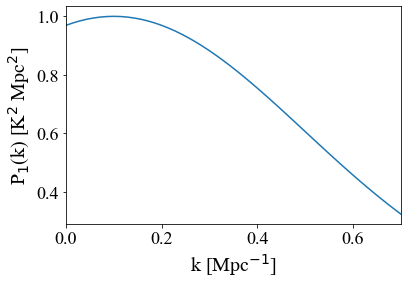

In [6]:
x = np.linspace(0,0.7,50)
plt.plot(x, ps(x))
plt.xlim(0,0.7)
plt.ylabel('P$_1$(k) [K$^2$ Mpc$^2$]',fontsize = 20)
plt.xlabel('k [Mpc$^{-1}$]', fontsize = 20)

# Single scale correlation

Here we will introduce the beta parameter that Michael developed. it is define as follows 

$$ \beta =  \begin{cases} 
      \pm1(1-\frac{|\sigma|}{\pi}) & \sigma \neq 0 \\
      \pm 1 & \sigma = 0
   \end{cases}
$$

The thing that actually does the work is $\sigma$. This is the stdev of a gaussian from which we draw random phases to attribute to each point in our Fourier map. For each element, we draw a unique $\phi$,

$$ \tilde{T}_{ij} e^{i\phi_{ij}}$$.

One thing to note is that we do have to manually input the sign of the correlation. 

In [7]:
sigma = 100
sign = 1

make_uni_corr = phase_corr_make_universe.universe(ps,npix_row,npix_col,Ly,Lx, mean = None, sigma_decorr = sigma, sign = sign) #100 Mpc by 100Mpc

field, corr_field = make_uni_corr.make_2D_universe()

x_spec = cross_pspec.Cross_Spectrum(field,corr_field,Lx,Ly,nbins,100)
p_cross = x_spec.compute_2D_pspec()

Text(0.5, 1.01, '$\\sigma = 100, sgn(\\sigma) = 1$')

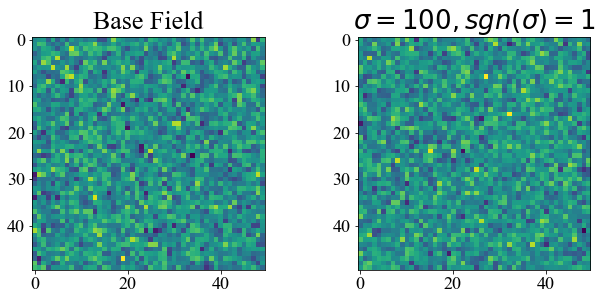

In [8]:
fig = plt.figure(figsize = (10,20),constrained_layout=False)
gs = fig.add_gridspec(1, 2,hspace =0.2, wspace= 0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(field)
ax1.set_title('Base Field', fontsize = 26, y = 1.01)

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(corr_field)
ax2.set_title('$\sigma = %i, sgn(\sigma) = 1$'%sigma, fontsize = 26, y= 1.01)




Text(0.5, 0, 'k [Mpc$^{-1}$]')

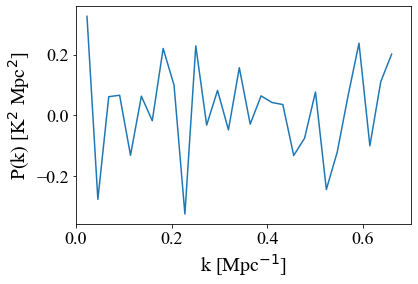

In [9]:
plt.plot(p_cross[0],p_cross[1])
plt.xlim(0,.7)
# plt.axvline(x = 0.1,color = 'r')
plt.ylabel('P(k) [K$^2$ Mpc$^2$]',fontsize = 20)
plt.xlabel('k [Mpc$^{-1}$]', fontsize = 20)

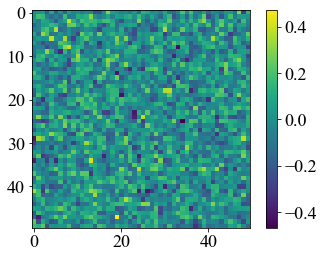

In [10]:
plt.imshow(field)
plt.colorbar()

# Multi-scale correlation

So for this we want to assign different correlations on different scales. This I think is tricky because we need to do this in a binned. hmmm ok. So for each bin, we need to go in and impose the correlations. We do this by drawing a different $\sigma$ for each mode bin depending on the correlation we want ot acheive. So now, we basically have a collection of gaussians from which we draw these $\phi$. For each bin, each element gets a different $\phi$ but drawn from the same gaussian. Then we move onto the next bin, pick a $\phi$ for each element of that bin, then move on. 

To start, let's make an array where we alternate randomly between correlated and anti-correlated modes.

Text(0.5, 0, 'k [Mpc$^{-1}$]')

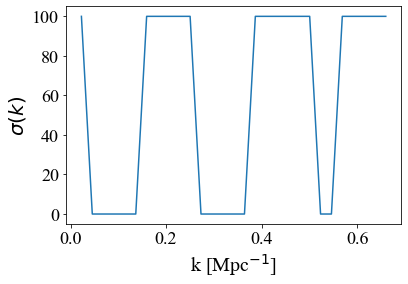

In [11]:

sigma_arr = [100,100,0,0,0,0,0,100,100,100,100,100,0,0,0,0,0,100,100,100,100,100,100,0,0,100,100,100,100,100]

plt.plot(p_cross[0],sigma_arr[1:])
plt.ylabel('$\sigma(k)$', fontsize = 20)
plt.xlabel('k [Mpc$^{-1}$]', fontsize = 20)

In [12]:
sigma_arr[29]

100

In [13]:
make_multi_corr = multi_k_corr.universe(ps,npix_row,npix_col,Ly,Lx, mean = None, sigma_decorr = sigma_arr, sign = sign, nbins = 30) #100 Mpc by 100Mpc

multi_field, multi_corr_field = make_multi_corr.make_2D_universe()

x_spec_multi = cross_pspec.Cross_Spectrum(multi_field,multi_corr_field,Lx,Ly,nbins,100)
p_cross_multi = x_spec_multi.compute_2D_pspec()

Text(0.5, 1.01, 'Multi-Scale Correlated')

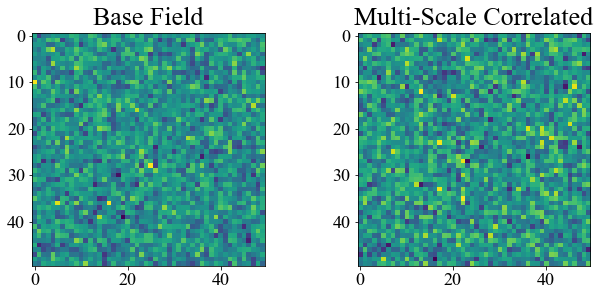

In [14]:
fig = plt.figure(figsize = (10,20),constrained_layout=False)
gs = fig.add_gridspec(1, 2,hspace =0.2, wspace= 0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(multi_field)
ax1.set_title('Base Field', fontsize = 26, y = 1.01)

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(multi_corr_field)
ax2.set_title('Multi-Scale Correlated', fontsize = 26, y= 1.01)



Text(0.5, 1.01, 'Cross Spectrum From Field Sims ')

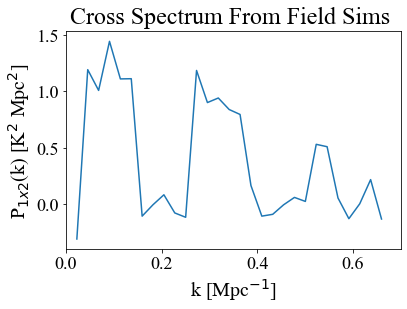

In [21]:
plt.plot(p_cross_multi[0],p_cross_multi[1], label = 'P(k) [K$^2$ Mpc$^2$]',)
# plt.plot(p_cross[0],np.asarray(sigma_arr[1:])/100,label = '$\sigma(k)$')
plt.xlim(0,.7)
# plt.axvline(x = 0.1,color = 'r')
plt.ylabel('P$_{1x2}$(k) [K$^2$ Mpc$^2$]', fontsize = 20)
plt.xlabel('k [Mpc$^{-1}$]', fontsize = 20)
# plt.legend(fontsize = 14)
plt.title('Cross Spectrum From Field Sims ', fontsize = 24, y = 1.01)

Text(0.5, 1.01, 'Theory Cross Spectrum')

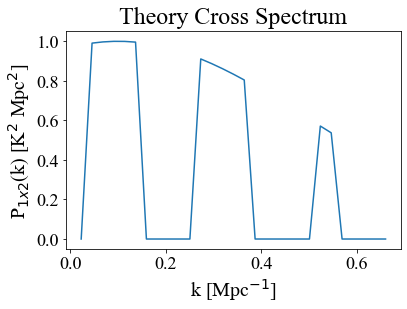

In [23]:
exponent = np.asarray(np.e**((-np.asarray(sigma_arr[1:])**2)/2))

type(ps(p_cross_multi[0]))
# plt.plot(p_cross_multi[0],p_cross_multi[1], label = 'P(k) [K$^2$ Mpc$^2$]',)
plt.plot(p_cross_multi[0],exponent*ps(p_cross_multi[0]))
plt.ylabel('P$_{1x2}$(k) [K$^2$ Mpc$^2$]', fontsize = 20)
plt.xlabel('k [Mpc$^{-1}$]', fontsize = 20)
plt.title('Theory Cross Spectrum', fontsize = 24, y = 1.01)